In [ ]:
# Basic Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Other Packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif, f_classif
from sklearn import metrics

# Models
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor

# Warnings
import warnings
warnings.filterwarnings('ignore')

* Problem Statement:- The goal is to predict the daily production of oil wells.








In [ ]:
# Load Data

dataset = pd.read_csv('/content/drive/MyDrive/ML - Dataset/Oil & Gas Domain/Oil_Well_dataset.csv')
dataset.head()

,WellID,Depth,YearDrilled,WellType,Geology,Production,Age,ProductionPerDepth
0,1,1360,2009,Offshore,Sandstone,464,15,0.341176
1,2,4272,2010,Offshore,Sandstone,339,14,0.079354
2,3,3592,1976,Onshore,Shale,387,48,0.107739
3,4,966,1973,Onshore,Shale,297,51,0.307453
4,5,4926,1968,Offshore,Sandstone,403,56,0.081811


In [ ]:
# Data Information

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WellID              1000 non-null   int64  
 1   Depth               1000 non-null   int64  
 2   YearDrilled         1000 non-null   int64  
 3   WellType            1000 non-null   object 
 4   Geology             1000 non-null   object 
 5   Production          1000 non-null   int64  
 6   Age                 1000 non-null   int64  
 7   ProductionPerDepth  1000 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


In [ ]:
# Data describe

dataset.describe()

,WellID,Depth,YearDrilled,Production,Age,ProductionPerDepth
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2815.422000,1991.804000,271.519000,32.196000,0.133407
std,288.819436,1255.514921,18.185772,130.117386,18.185772,0.124346
min,1.000000,503.000000,1960.000000,50.000000,1.000000,0.010781
25%,250.750000,1749.500000,1976.000000,155.750000,16.750000,0.053152
50%,500.500000,2862.500000,1992.000000,266.000000,32.000000,0.096448
75%,750.250000,3849.500000,2007.250000,387.000000,48.000000,0.158240
max,1000.000000,4999.000000,2023.000000,499.000000,64.000000,0.851064


Checking missing values

In [ ]:
dataset.isnull().sum()

,0
WellID,0
Depth,0
YearDrilled,0
WellType,0
Geology,0
Production,0
Age,0
ProductionPerDepth,0


Encoding - Convert categorical features to numerical

In [ ]:
# Unique values in categorical features

for feature in dataset:
  if dataset[feature].dtypes == 'O':
    print('*'*5, feature, '*'*5)
    print(set(dataset[feature].unique().tolist()))
    print()

***** WellType *****
{'Onshore', 'Offshore'}

***** Geology *****
{'Limestone', 'Shale', 'Sandstone'}



In [ ]:
dataset = pd.get_dummies(dataset, columns=['WellType','Geology'],
                         drop_first=True, dtype='int')
dataset.head()

,WellID,Depth,YearDrilled,Production,Age,ProductionPerDepth,WellType_Onshore,Geology_Sandstone,Geology_Shale
0,1,1360,2009,464,15,0.341176,0,1,0
1,2,4272,2010,339,14,0.079354,0,1,0
2,3,3592,1976,387,48,0.107739,1,0,1
3,4,966,1973,297,51,0.307453,1,0,1
4,5,4926,1968,403,56,0.081811,0,1,0


Split the data

In [ ]:
# Dependent & Independent

x = dataset.drop('Production', axis=1)
y = dataset['Production']

In [ ]:
x = x.drop(['WellID','YearDrilled'], axis=1)
x.head()

,Depth,Age,ProductionPerDepth,WellType_Onshore,Geology_Sandstone,Geology_Shale
0,1360,15,0.341176,0,1,0
1,4272,14,0.079354,0,1,0
2,3592,48,0.107739,1,0,1
3,966,51,0.307453,1,0,1
4,4926,56,0.081811,0,1,0


In [ ]:
# Training & Validation

x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train1.shape)
print(x_test1.shape)

(800, 6)
(200, 6)


Feature Scalling

In [ ]:
scaler = StandardScaler()

x_train_sc = pd.DataFrame(scaler.fit_transform(x_train1), columns=x_train1.columns)
x_test_sc = pd.DataFrame(scaler.transform(x_test1), columns=x_test1.columns)

In [ ]:
x_train_sc.head()

,Depth,Age,ProductionPerDepth,WellType_Onshore,Geology_Sandstone,Geology_Shale
0,-0.627722,-0.156931,0.384328,1.038230,1.389389,-0.717741
1,0.563185,1.788211,-0.575081,1.038230,1.389389,-0.717741
2,1.352331,-0.268082,-0.907161,1.038230,1.389389,-0.717741
3,0.444973,1.510333,-0.864024,-0.963177,1.389389,-0.717741
4,0.045608,0.676701,-0.752903,-0.963177,-0.719741,-0.717741


Variance Inflation Factor

In [ ]:
# Variance Inflation Factor

vif = pd.DataFrame()
vif['Feature'] = x_train_sc.columns
vif['VIF'] = [variance_inflation_factor(x_train_sc,i) for i in range(x_train1.shape[1])]
vif

,Feature,VIF
0,Depth,1.792967
1,Age,1.005990
2,ProductionPerDepth,1.791684
3,WellType_Onshore,1.001374
4,Geology_Sandstone,1.368329
5,Geology_Shale,1.370647


Chi-Square Test

In [ ]:
num_feature = []
cat_feature = []

for feature in dataset.columns:
  if len(dataset[feature].unique())>6:
    num_feature.append(feature)
  else:
    cat_feature.append(feature)

print('Numerical Features:-', num_feature)
print('Categorical Features:-', cat_feature)

Numerical Features:- ['WellID', 'Depth', 'YearDrilled', 'Production', 'Age', 'ProductionPerDepth']
Categorical Features:- ['WellType_Onshore', 'Geology_Sandstone', 'Geology_Shale']


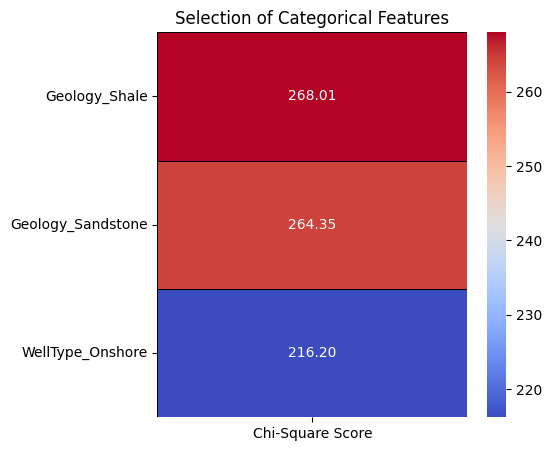

In [ ]:
features = dataset.loc[:, cat_feature] # Categorical independent variable
target = dataset.loc[:, 'Production'] # Target variable

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

feature_score = pd.DataFrame(data=fit.scores_, index=list(cat_feature),
                             columns=['Chi-Square Score'])

plt.figure(figsize=(5,5))
sns.heatmap(feature_score.sort_values(by='Chi-Square Score', ascending=False),
            annot=True, linecolor='black', linewidths=0.4, cmap='coolwarm', fmt='.2f')
plt.title('Selection of Categorical Features')
plt.show()

Anova Test

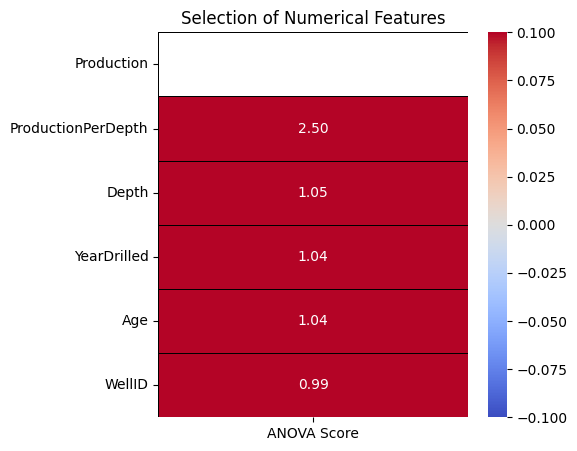

In [ ]:
features = dataset.loc[:, num_feature] # Numerical independent variable
target = dataset.loc[:, 'Production'] # Target variable

best_features = SelectKBest(score_func= f_classif, k='all')
fit = best_features.fit(features, target)

feature_score = pd.DataFrame(data=fit.scores_, index=list(num_feature),
                             columns=['ANOVA Score'])

plt.figure(figsize=(5,5))
sns.heatmap(feature_score.sort_values(by='ANOVA Score', ascending=False),
            annot=True, cmap='coolwarm', linecolor='black', linewidths=0.4, fmt='.2f')
plt.title('Selection of Numerical Features')
plt.show()

In [ ]:
# values should not be equal in heatmap otherwise there should be multicolinearity problem
# here YearDrilled & Age is equal so any one we have to drop; we already dropped YearDrilled

Correlation

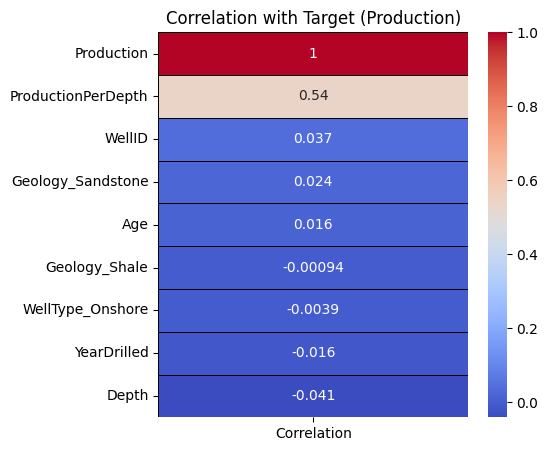

In [ ]:
corr = dataset.corrwith(dataset['Production']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlation']

plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, linecolor='black', linewidths=0.4, cmap='coolwarm')
plt.title('Correlation with Target (Production)')
plt.show()

In [ ]:
x.head()

,Depth,Age,ProductionPerDepth,WellType_Onshore,Geology_Sandstone,Geology_Shale
0,1360,15,0.341176,0,1,0
1,4272,14,0.079354,0,1,0
2,3592,48,0.107739,1,0,1
3,966,51,0.307453,1,0,1
4,4926,56,0.081811,0,1,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

### Model Building

#### Linear Regression - OLS Method

In [ ]:
# Training data without scaled

lin_reg = smf.OLS(endog=y_train, exog=x_train).fit()
print(lin_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:             Production   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              1213.
Date:                Sat, 28 Sep 2024   Prob (F-statistic):                        0.00
Time:                        16:01:47   Log-Likelihood:                         -4777.8
No. Observations:                 800   AIC:                                      9568.
Df Residuals:                     794   BIC:                                      9596.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [ ]:
# Testing data without scaled

lin_reg1 = smf.OLS(endog=y_test, exog=x_test).fit()
print(lin_reg1.summary())

                                 OLS Regression Results                                
Dep. Variable:             Production   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              310.4
Date:                Sat, 28 Sep 2024   Prob (F-statistic):                    1.39e-96
Time:                        15:57:48   Log-Likelihood:                         -1184.4
No. Observations:                 200   AIC:                                      2381.
Df Residuals:                     194   BIC:                                      2401.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

#### Linear Regression - Sklearn

In [ ]:
# Model Building
lr = LinearRegression()
lr.fit(x_train, y_train)

# Predict
y_pred_lr_train = lr.predict(x_train)
y_pred_lr_test = lr.predict(x_test)

# Model Evaluation
lr_train = metrics.r2_score(y_train, y_pred_lr_train)
lr_test = metrics.r2_score(y_test, y_pred_lr_test)
print(f'Training Accuracy:- {round(lr_train*100,2)}%')
print(f'Testing Accuracy:- {round(lr_test*100,2)}%')

Training Accuracy:- 46.72%
Testing Accuracy:- 50.56%


#### Regularization

*   Lasso - L1
*   Ridge - L2
*   Elastinet - L1+L2


In [ ]:
# Lasso Model
lasso = Lasso(alpha=0.3)
lasso.fit(x_train, y_train)

# Predict
y_pred_lasso_train = lasso.predict(x_train)
y_pred_lasso_test = lasso.predict(x_test)

# Model Evaluation
lasso_train = metrics.r2_score(y_train, y_pred_lasso_train)
lasso_test = metrics.r2_score(y_test, y_pred_lasso_test)
print(f'Training Accuracy:- {round(lasso_train*100,2)}%')
print(f'Testing Accuracy:- {round(lasso_test*100,2)}%')

Training Accuracy:- 46.64%
Testing Accuracy:- 50.44%
[ 5.63816757e-02 -1.43807959e-01  9.22755384e+02  4.15001577e+00
 -1.28007365e+00 -0.00000000e+00]


In [ ]:
# Ridge Model
ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)

# Predict
y_pred_ridge_train = ridge.predict(x_train)
y_pred_ridge_test = ridge.predict(x_test)

# Model Evaluation
ridge_train = metrics.r2_score(y_train, y_pred_ridge_train)
ridge_test = metrics.r2_score(y_test, y_pred_ridge_test)
print(f'Training Accuracy:- {round(ridge_train*100,2)}%')
print(f'Testing Accuracy:- {round(ridge_test*100,2)}%')

Training Accuracy:- 46.64%
Testing Accuracy:- 50.28%


In [ ]:
# Elastinet Model
elast = ElasticNet(alpha=0.3, l1_ratio=0.1)
elast.fit(x_train, y_train)

# Predict
y_pred_elast_train = elast.predict(x_train)
y_pred_elast_test = elast.predict(x_test)

# Model Evaluation
elast_train = metrics.r2_score(y_train, y_pred_elast_train)
elast_test = metrics.r2_score(y_test, y_pred_elast_test)
print(f'Training Accuracy:- {round(elast_train*100,2)}%')
print(f'Testing Accuracy:- {round(elast_test*100,2)}%')

Training Accuracy:- 2.99%
Testing Accuracy:- 2.53%


#### Model Selection

In [ ]:
# Initialize the models

estimators = [
    ('lr',LinearRegression()),
     ('rf',RandomForestRegressor()),
      ('gb',GradientBoostingRegressor()),
       ('dt',DecisionTreeRegressor())
]

models = {
    'Linear_Regression' : LinearRegression(),
    'RandomForest_Regressor' : RandomForestRegressor(),
    'GradientBoosting_Regressor' : GradientBoostingRegressor(),
    'DecisionTree_Regressor' : DecisionTreeRegressor(),
    'Voting_Regressor' : VotingRegressor(estimators=estimators),
    'Stacking_Regressor': StackingRegressor(estimators=estimators, final_estimator=Ridge())
}

In [ ]:
results = {}

for name, model in models.items():
  # Model Train
  model.fit(x_train, y_train)

  # Model Predict
  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)

  # Model Evaluation
  r2_train = metrics.r2_score(y_train, y_pred_train)
  r2_test = metrics.r2_score(y_test, y_pred_test)

  mse_train = metrics.mean_squared_error(y_train, y_pred_train)
  mse_test = metrics.mean_squared_error(y_test, y_pred_test)

  # Print Results
  results[name] = (r2_train, r2_test, mse_train, mse_test)
  print('****', name, '****')
  print(f'R2_Score Training:- {round(r2_train*100,2)}%')
  print(f'R2_Score Testing:- {round(r2_test*100,2)}%')
  print()
  print(f'MSE Training:- {round(mse_train,2)}')
  print(f'MSE Testing:- {round(mse_test,2)}')
  print('-'*40)

**** Linear_Regression ****
R2_Score Training:- 46.72%
R2_Score Testing:- 50.56%

MSE Training:- 9004.56
MSE Testing:- 8351.94
----------------------------------------
**** RandomForest_Regressor ****
R2_Score Training:- 99.85%
R2_Score Testing:- 98.92%

MSE Training:- 25.08
MSE Testing:- 182.17
----------------------------------------
**** GradientBoosting_Regressor ****
R2_Score Training:- 99.34%
R2_Score Testing:- 98.31%

MSE Training:- 111.22
MSE Testing:- 284.71
----------------------------------------
**** DecisionTree_Regressor ****
R2_Score Training:- 100.0%
R2_Score Testing:- 97.64%

MSE Training:- 0.0
MSE Testing:- 397.85
----------------------------------------
**** Voting_Regressor ****
R2_Score Training:- 96.35%
R2_Score Testing:- 95.59%

MSE Training:- 616.34
MSE Testing:- 744.82
----------------------------------------
**** Stacking_Regressor ****
R2_Score Training:- 99.81%
R2_Score Testing:- 99.09%

MSE Training:- 31.67
MSE Testing:- 152.93
-----------------------------

In [ ]:
# Model Comparison

best_model = max(results, key=lambda x: results[x][1])
train_r2, test_r2, train_mse, test_mse = results[best_model]
print(f'The best model is {best_model} with R2 Score of {round(test_r2*100,2)}% & MSE of {round(test_mse*100,2)}%')

The best model is Stacking_Regressor with R2 Score of 99.01% & MSE of 16659.46%


In [ ]:
# Stacking Model
stack = StackingRegressor(estimators=estimators, final_estimator=Ridge())
stack.fit(x_train, y_train)

# Predict
y_pred_stack_train = stack.predict(x_train)
y_pred_stack_test = stack.predict(x_test)

# Model Evaluation
stack_train = metrics.r2_score(y_train, y_pred_stack_train)
stack_test = metrics.r2_score(y_test, y_pred_stack_test)
print(f'Training Accuracy:- {round(stack_train*100,2)}%')
print(f'Testing Accuracy:- {round(stack_test*100,2)}%')

Training Accuracy:- 99.81%
Testing Accuracy:- 98.98%


In [ ]:
import pickle
pickle.dump(stack, open('Oil_well.pkl', 'wb'))